In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from transmitter import transmitter
from receiver import receiver

In [2]:
def success(a, b):
    """find the percentage difference between two lists"""
    successes = 0

    for index, i in enumerate(a):
        if i == b[index]:
            successes += 1 / len(a)

    return successes

### Transmitter

LDPC Padding Length: 296
OFDM Padding Length: 1966


/Users/maxiyengar/Documents/GF3/GF3/ldpc_jossy/transmitter.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  to_transmit[index]  = np.concatenate((cyclic_prefix, x), axis = None)


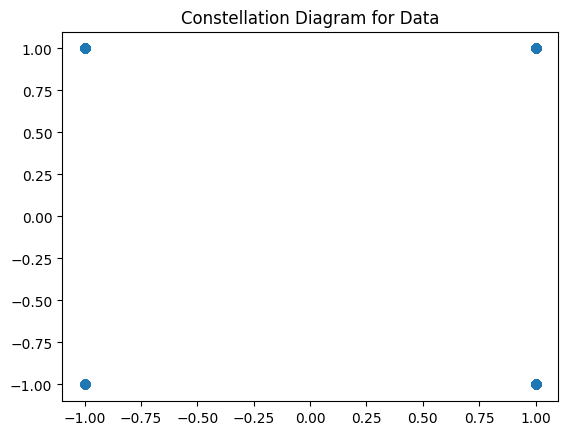

In [3]:
t = transmitter()

# to_transmit = t.transmit("max_test_in.txt")
# # N.B. I think my gray coding method is v. slow(?)

binary_data = t.process_file("max_test_in.txt")
ldpc_encoded = t.ldpc_encode(binary_data)
to_transmit = t.ofdm(ldpc_encoded)

plt.scatter(t.constellation[0:500].real, t.constellation[0:500].imag)
plt.title("Constellation Diagram for Data")
plt.show()



### Simulated Channel

In [4]:
channel_response = np.loadtxt('../weekend_files/channel.csv', delimiter = ",", dtype = "float")

to_decode = np.convolve(channel_response, to_transmit)

to_decode = to_decode[:-1 * len(channel_response) + 1]

# NOISE

for index, i in enumerate(to_decode):
    to_decode[index] = i + random.gauss(0.0, 0.006)

### Decoder

In [5]:
r = receiver()

ldpc_coded = r.ofdm(to_decode) # Again I think the gray coding is quite slow

# for index, i in enumerate(r.constellations[0]):

#     if np.real(t.constellation[index]) >= 0 and np.imag(t.constellation[index]) >= 0:
#         color='red'
#     elif np.real(t.constellation[index]) <= 0 and np.imag(t.constellation[index]) >= 0:
#         color='blue'
#     elif np.real(t.constellation[index]) <= 0 and np.imag(t.constellation[index]) <= 0:
#         color='green'
#     elif np.real(t.constellation[index]) >= 0 and np.imag(t.constellation[index]) <= 0:
#         color='yellow'

#     plt.scatter(i.real, i.imag, color=color)

# plt.title("Received constellation diagram under simulated channel")
# plt.show()

decoded = r.ldpc_decode(ldpc_coded)
text = r.decode_text(decoded)
print(text)

print("Error rate (No LDPC)", success(ldpc_coded, ldpc_encoded))
print("Error rate (w/ LDPC)", success(decoded[0:82000], binary_data[0:82648]))

Number of OFDM Blocks:  128
[  81.35142556  -98.91005476  105.78573804 ...  -68.33740753   69.76905786
 -102.60848371]
[ 19.56505186 -30.01251263 -21.33447167 ... -29.99616842 -23.94355399
  21.49841955]
[ 43.39877978  40.69468787 -38.21488488 ...  35.15042448 -37.5380155
 -35.11748946]
[ 77.14479897 -67.09492785 -54.69490005 ... -58.00460962  50.80782129
 -55.02923296]
[ 76.0659143  113.78731273 -86.5591547  ... 110.39882576  93.06180687
  97.37661382]
[ 43.00303143 -40.879007   -36.6797873  ...  37.97243895 -33.26647374
 -24.23322016]
[ 57.07606447 -59.67747121 -51.64370915 ...  29.24268818 -40.49780784
 -30.5879015 ]
[ 166.67484601  109.52828356 -140.73091516 ... -137.13946492 -115.62475803
  103.94658764]
[ 89.68958598 -89.76816367 -89.75868    ... -74.76164773  82.8895727
  79.15445965]
[ 51.93270385 -42.1858153  -27.91291206 ... -28.12035401  40.55163902
 -27.16180348]
[ 70.2857532  -53.10911694  65.31663321 ... -58.32943728 -49.21362342
 -62.46557248]
[ 43.41283041 -43.41065908 